# ***Complete Guide to Generative AI for Data Analysis and Data Science - Contd***

---



### Chapter 16: *Network Analysis*

a) Introduction to NetworkX

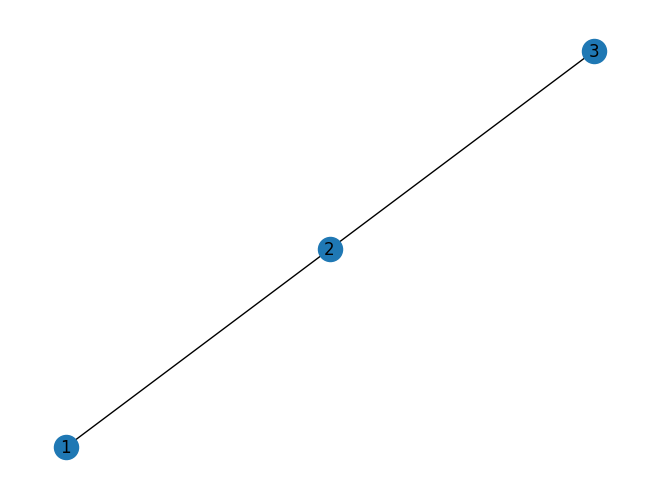

In [1]:
#Creating a graph
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges
G.add_edge(1, 2)
G.add_edge(2, 3)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

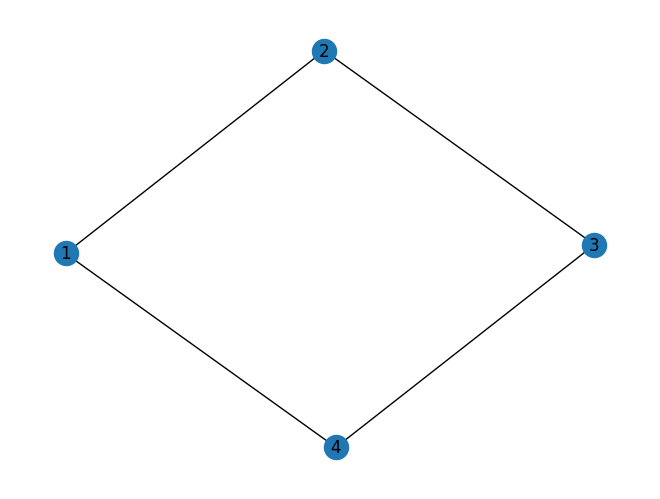

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4])

# Add edges
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

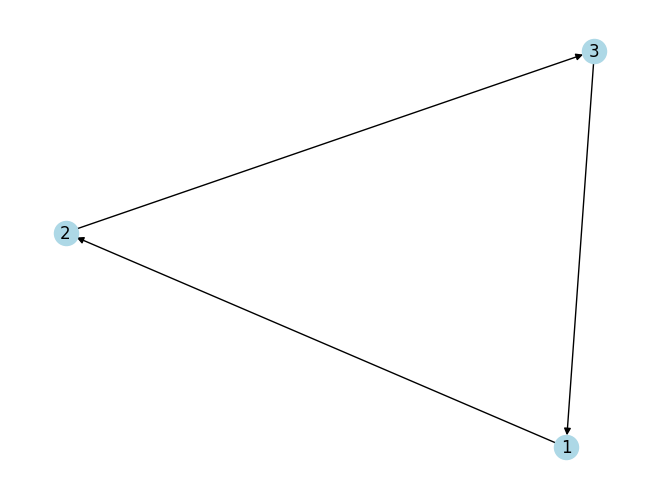

In [3]:
#Creating a directed graph
DG = nx.DiGraph()

# Add nodes and edges
DG.add_nodes_from([1, 2, 3])
DG.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Draw the directed graph
nx.draw(DG, with_labels=True, node_color='lightblue', arrows=True)
plt.show()

In [4]:
#Assinging and accessing weights of the graph
# Create a graph
G = nx.Graph()

# Add nodes with attributes
G.add_node(1, label='A')
G.add_node(2, label='B')

# Add an edge with a weight attribute
G.add_edge(1, 2, weight=4.2)

# Access node attributes
print(G.nodes[1]['label'])

# Access edge attributes
print(G[1][2]['weight'])

A
4.2


In [5]:
#Finding the shortest path
# Create a graph
G = nx.Graph()

# Add nodes and edges
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# Find the shortest path between nodes 1 and 5
shortest_path = nx.shortest_path(G, source=1, target=5)
print("Shortest path:", shortest_path)

Shortest path: [1, 2, 4, 5]


In [6]:
#Calculating the centrality measure
# Create a graph
G = nx.Graph()

# Add nodes and edges
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree centrality:", degree_centrality)

Degree centrality: {1: 0.5, 2: 0.5, 3: 0.5, 4: 0.75, 5: 0.25}


b) Social Network Analysis

In [7]:
import networkx as nx
import pandas as pd
import random

# 1. Generate 50 realistic usernames
first_names = ['alex', 'jordan', 'taylor', 'casey', 'morgan', 'sam', 'ryan', 'jamie', 'kyle', 'drew']
last_names = ['smith', 'johnson', 'williams', 'brown', 'jones', 'miller', 'davis', 'garcia', 'martinez', 'lee']

usernames = []
while len(usernames) < 50:
    username = random.choice(first_names) + '_' + random.choice(last_names)
    if username not in usernames:
        usernames.append(username)

# 2. Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(usernames)

# 3. Add 200 random "follows" edges
edges = set()
while len(edges) < 200:
    follower = random.choice(usernames)
    followee = random.choice(usernames)
    if follower != followee:
        edges.add((follower, followee))

G.add_edges_from(edges)

# 4. Save the edges to CSV
edge_df = pd.DataFrame(list(G.edges), columns=['Follower', 'Followee'])
edge_df.to_csv('social_network_edges.csv', index=False)

print("CSV file 'social_network_edges.csv' created with 50 users and 200 edges.")

CSV file 'social_network_edges.csv' created with 50 users and 200 edges.


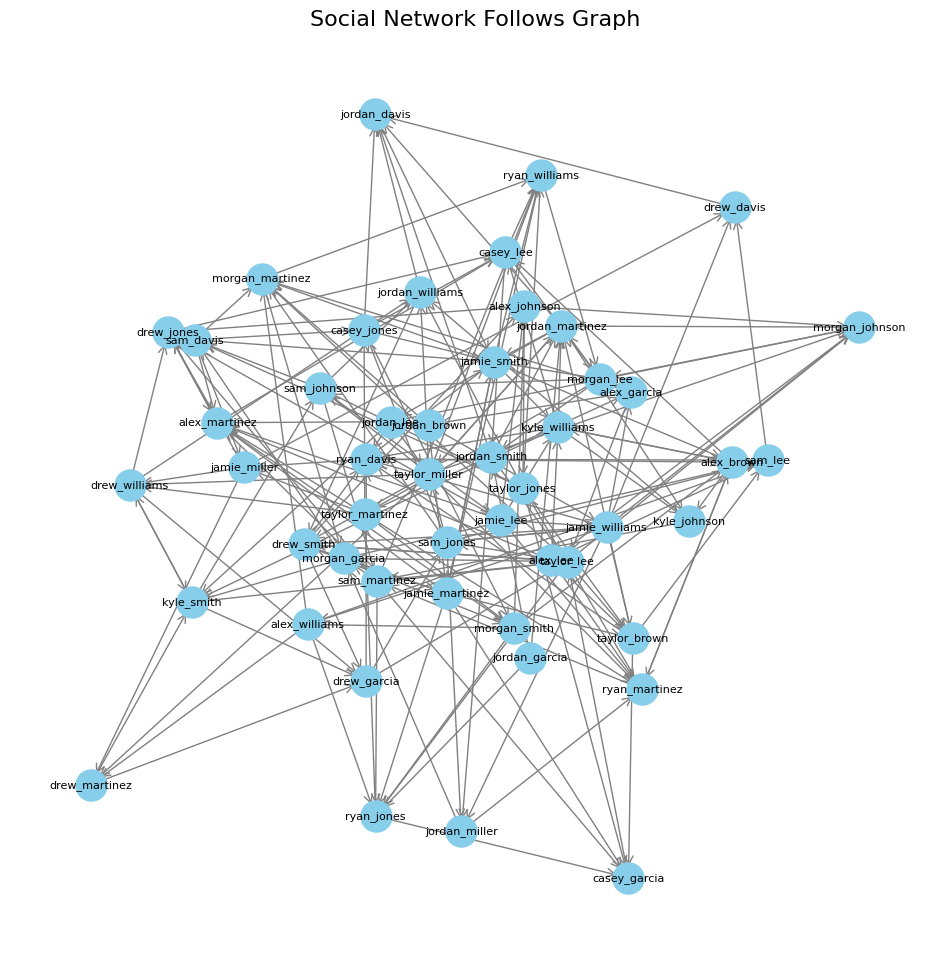

In [8]:
import matplotlib.pyplot as plt

# 5. Visualize the graph
plt.figure(figsize=(12, 12))

# Use spring layout for positioning nodes
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500)

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, edge_color='gray')

# Draw labels (usernames)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Social Network Follows Graph", fontsize=16)
plt.axis('off')  # Hide axes
plt.show()

In [9]:
# 6. List the top 3 most followed users
in_degrees = G.in_degree()  # Returns a DegreeView (node, in-degree)
# Convert to dictionary and sort by in-degree descending
sorted_in_degrees = sorted(in_degrees, key=lambda x: x[1], reverse=True)

top_3 = sorted_in_degrees[:3]

print("Top 3 most followed users:")
for username, followers in top_3:
    print(f"{username}: {followers} followers")

Top 3 most followed users:
alex_martinez: 8 followers
jordan_martinez: 7 followers
morgan_martinez: 7 followers


c) Supply Chains and Network Analysis

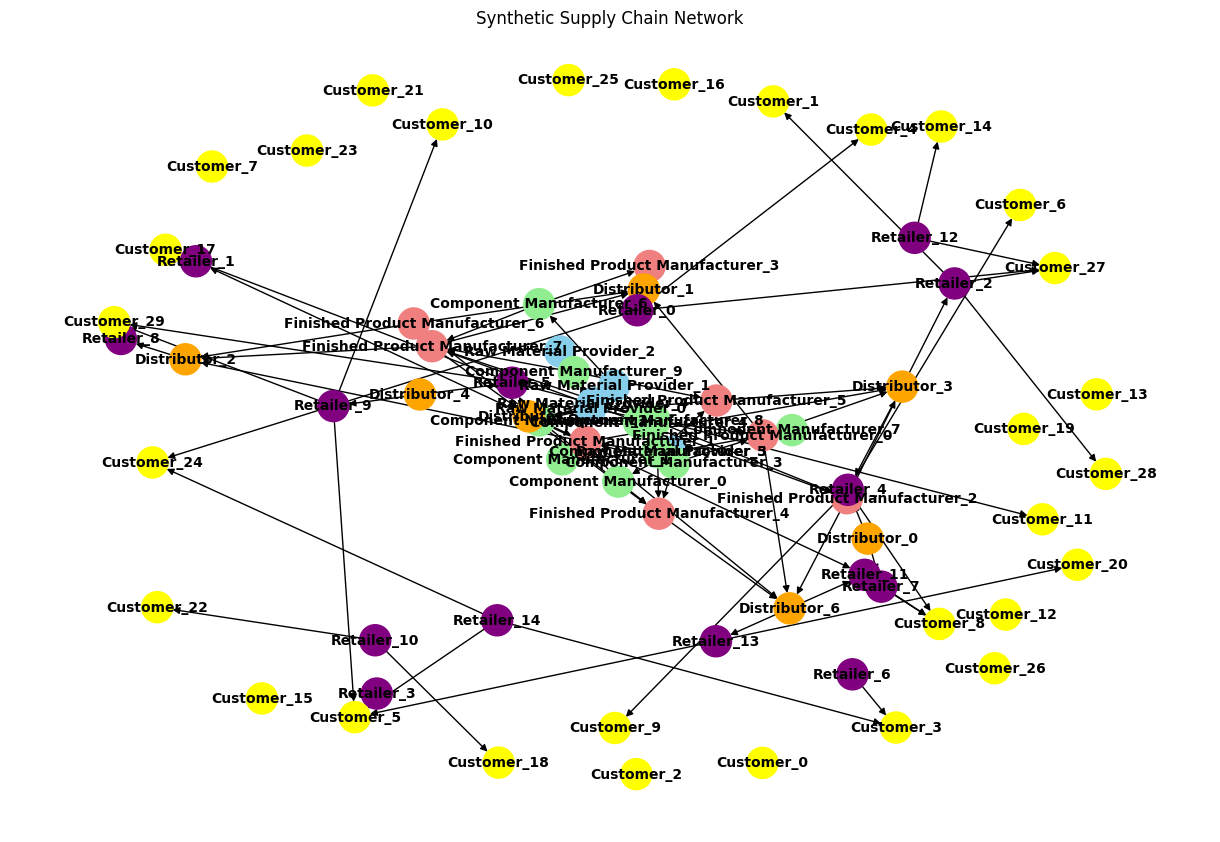

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Define the different types of nodes in the supply chain
node_types = [
    'Raw Material Provider', 'Component Manufacturer',
    'Finished Product Manufacturer', 'Distributor',
    'Retailer', 'Customer'
]

# Define the number of nodes for each type
nodes_count = {
    'Raw Material Provider': 5,
    'Component Manufacturer': 10,
    'Finished Product Manufacturer': 8,
    'Distributor': 7,
    'Retailer': 15,
    'Customer': 30
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph with type attributes
for node_type in node_types:
    for i in range(nodes_count[node_type]):
        G.add_node(f"{node_type}_{i}", type=node_type)

# Function to connect nodes randomly with some logic for a realistic supply chain
def connect_nodes(source_type, target_type, min_edges=1, max_edges=3):
    sources = [node for node, attr in G.nodes(data=True) if attr['type'] == source_type]
    targets = [node for node, attr in G.nodes(data=True) if attr['type'] == target_type]
    for source in sources:
        num_edges = random.randint(min_edges, max_edges)
        connected_targets = random.sample(targets, num_edges)
        for target in connected_targets:
            G.add_edge(source, target)

# Connect nodes in the supply chain
connect_nodes('Raw Material Provider', 'Component Manufacturer')
connect_nodes('Component Manufacturer', 'Finished Product Manufacturer')
connect_nodes('Finished Product Manufacturer', 'Distributor')
connect_nodes('Distributor', 'Retailer')
connect_nodes('Retailer', 'Customer')

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
node_colors = {
    'Raw Material Provider': 'skyblue',
    'Component Manufacturer': 'lightgreen',
    'Finished Product Manufacturer': 'lightcoral',
    'Distributor': 'orange',
    'Retailer': 'purple',
    'Customer': 'yellow'
}
color_map = [node_colors[G.nodes[node]['type']] for node in G]

nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=500, font_size=10, font_color='black', font_weight='bold')
plt.title("Synthetic Supply Chain Network")
plt.show()

d) Improving the Complex Supply Chain Visualization

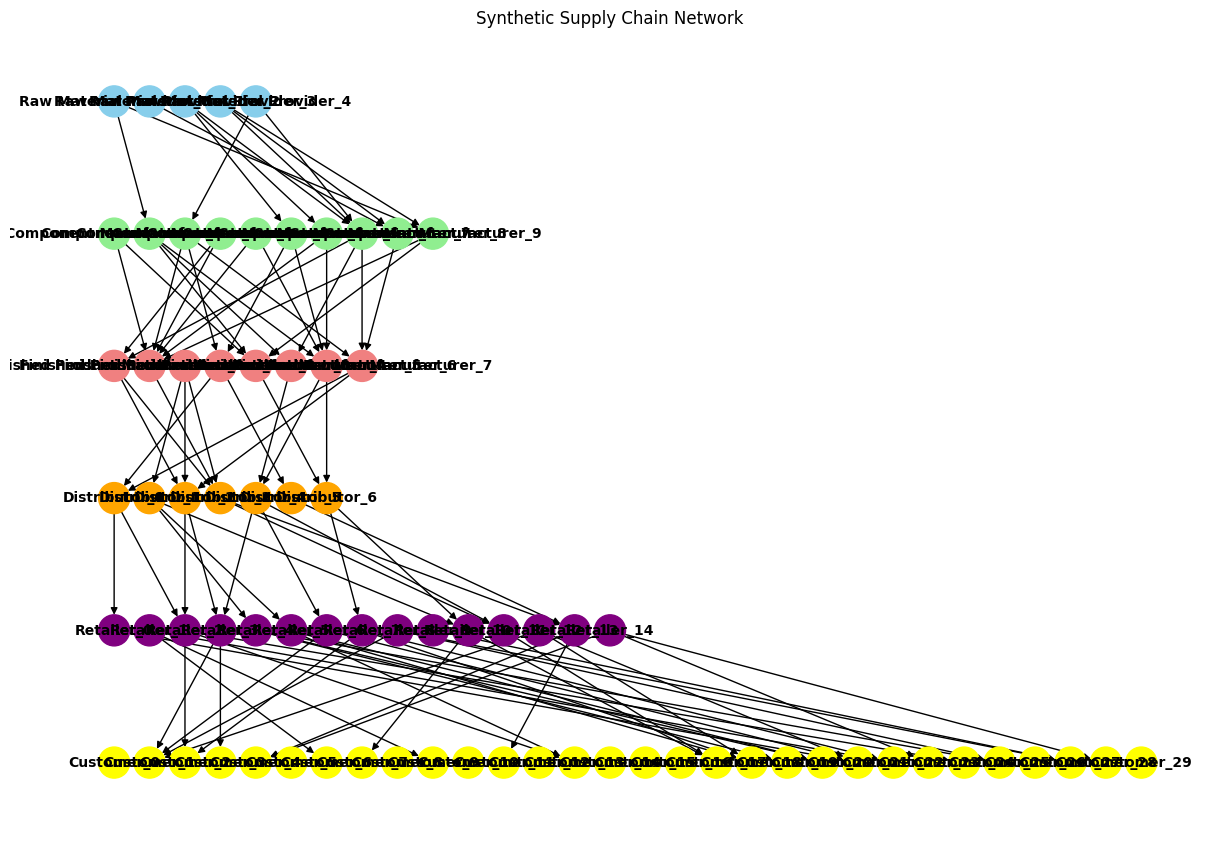

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Define the different types of nodes in the supply chain
node_types = [
    'Raw Material Provider', 'Component Manufacturer',
    'Finished Product Manufacturer', 'Distributor',
    'Retailer', 'Customer'
]

# Define the number of nodes for each type
nodes_count = {
    'Raw Material Provider': 5,
    'Component Manufacturer': 10,
    'Finished Product Manufacturer': 8,
    'Distributor': 7,
    'Retailer': 15,
    'Customer': 30
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph with type attributes
for node_type in node_types:
    for i in range(nodes_count[node_type]):
        G.add_node(f"{node_type}_{i}", type=node_type)

# Function to connect nodes randomly with some logic for a realistic supply chain
def connect_nodes(source_type, target_type, min_edges=1, max_edges=3):
    sources = [node for node, attr in G.nodes(data=True) if attr['type'] == source_type]
    targets = [node for node, attr in G.nodes(data=True) if attr['type'] == target_type]
    for source in sources:
        num_edges = random.randint(min_edges, max_edges)
        connected_targets = random.sample(targets, num_edges)
        for target in connected_targets:
            G.add_edge(source, target)

# Connect nodes in the supply chain
connect_nodes('Raw Material Provider', 'Component Manufacturer')
connect_nodes('Component Manufacturer', 'Finished Product Manufacturer')
connect_nodes('Finished Product Manufacturer', 'Distributor')
connect_nodes('Distributor', 'Retailer')
connect_nodes('Retailer', 'Customer')

# Create a custom hierarchical layout
pos = {}
layer_gap = 1.0  # vertical gap between layers
node_gap = 1.0  # horizontal gap between nodes in the same layer

# Assign positions to each node type
for idx, node_type in enumerate(node_types):
    nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == node_type]
    for i, node in enumerate(nodes):
        pos[node] = (i * node_gap, -idx * layer_gap)

# Draw the graph
plt.figure(figsize=(12, 8))
node_colors = {
    'Raw Material Provider': 'skyblue',
    'Component Manufacturer': 'lightgreen',
    'Finished Product Manufacturer': 'lightcoral',
    'Distributor': 'orange',
    'Retailer': 'purple',
    'Customer': 'yellow'
}
color_map = [node_colors[G.nodes[node]['type']] for node in G]

nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=500, font_size=10, font_color='black', font_weight='bold')
plt.title("Synthetic Supply Chain Network")
plt.show()

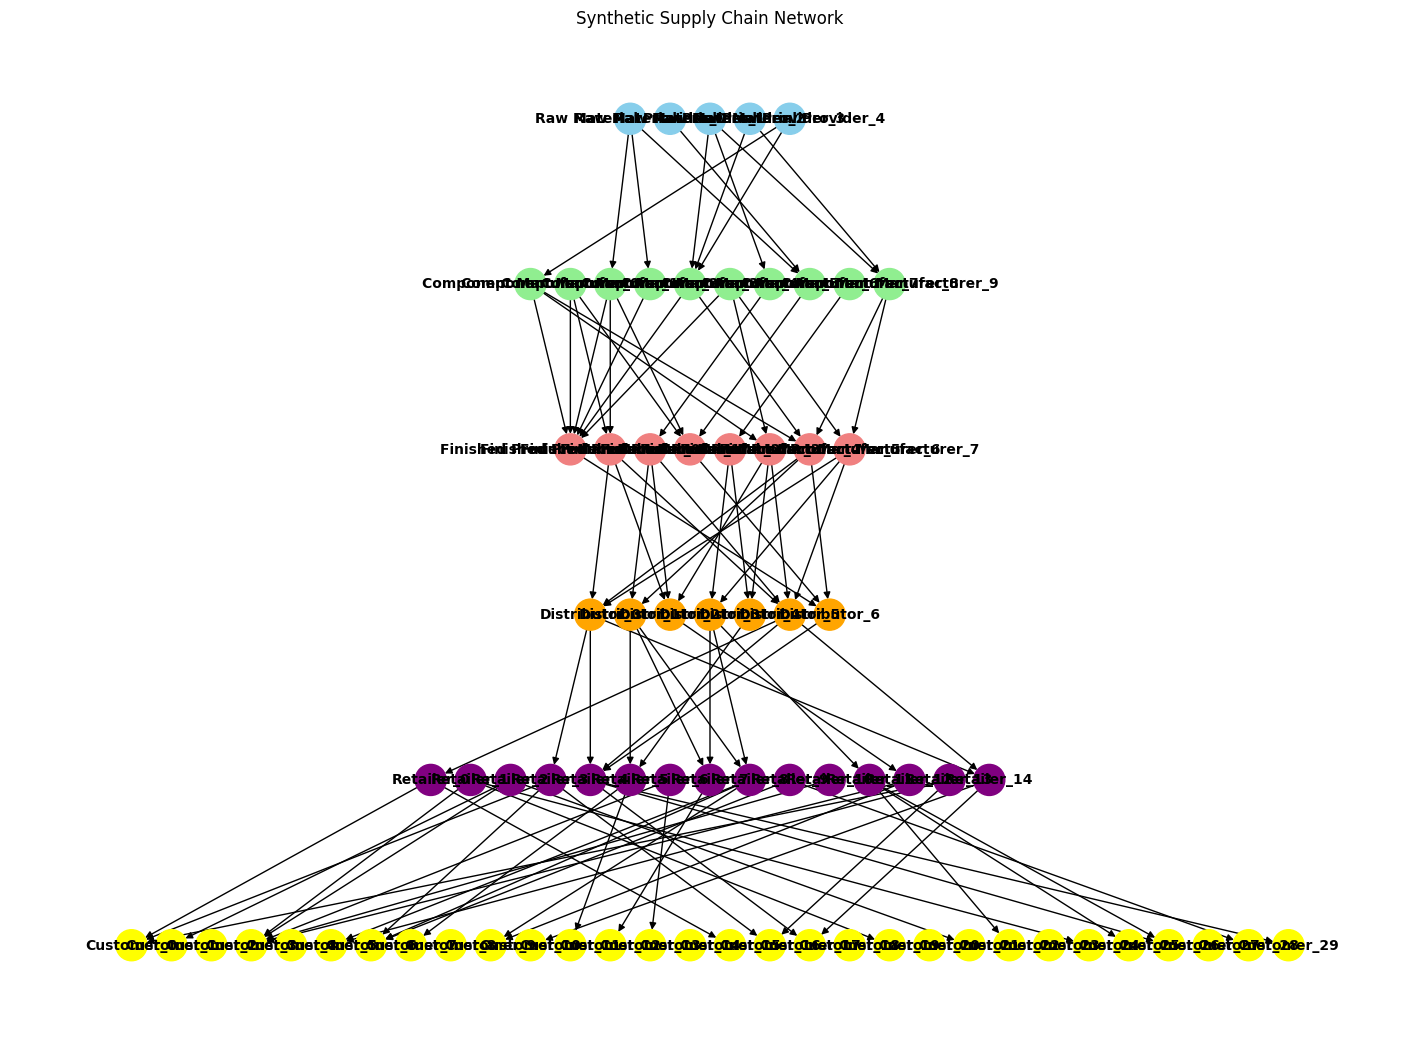

In [12]:
#To remove overlap


import networkx as nx
import matplotlib.pyplot as plt
import random

# Define the different types of nodes in the supply chain
node_types = [
    'Raw Material Provider', 'Component Manufacturer',
    'Finished Product Manufacturer', 'Distributor',
    'Retailer', 'Customer'
]

# Define the number of nodes for each type
nodes_count = {
    'Raw Material Provider': 5,
    'Component Manufacturer': 10,
    'Finished Product Manufacturer': 8,
    'Distributor': 7,
    'Retailer': 15,
    'Customer': 30
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph with type attributes
for node_type in node_types:
    for i in range(nodes_count[node_type]):
        G.add_node(f"{node_type}_{i}", type=node_type)

# Function to connect nodes randomly with some logic for a realistic supply chain
def connect_nodes(source_type, target_type, min_edges=1, max_edges=3):
    sources = [node for node, attr in G.nodes(data=True) if attr['type'] == source_type]
    targets = [node for node, attr in G.nodes(data=True) if attr['type'] == target_type]
    for source in sources:
        num_edges = random.randint(min_edges, max_edges)
        connected_targets = random.sample(targets, num_edges)
        for target in connected_targets:
            G.add_edge(source, target)

# Connect nodes in the supply chain
connect_nodes('Raw Material Provider', 'Component Manufacturer')
connect_nodes('Component Manufacturer', 'Finished Product Manufacturer')
connect_nodes('Finished Product Manufacturer', 'Distributor')
connect_nodes('Distributor', 'Retailer')
connect_nodes('Retailer', 'Customer')

# Create a custom hierarchical layout with no overlap
pos = {}
layer_gap = 2.0  # vertical gap between layers
node_gap = 3.0  # horizontal gap between nodes in the same layer

# Assign positions to each node type
for idx, node_type in enumerate(node_types):
    nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == node_type]
    for i, node in enumerate(nodes):
        pos[node] = (i * node_gap - (len(nodes) - 1) * node_gap / 2, -idx * layer_gap)

# Draw the graph
plt.figure(figsize=(14, 10))
node_colors = {
    'Raw Material Provider': 'skyblue',
    'Component Manufacturer': 'lightgreen',
    'Finished Product Manufacturer': 'lightcoral',
    'Distributor': 'orange',
    'Retailer': 'purple',
    'Customer': 'yellow'
}
color_map = [node_colors[G.nodes[node]['type']] for node in G]

nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=500, font_size=10, font_color='black', font_weight='bold')
plt.title("Synthetic Supply Chain Network")
plt.show()

e) Finding Highest Betweenness Score

In [13]:
from operator import itemgetter

def top_betweenness_nodes(G, top_n=5):
    """
    Find the top nodes with the highest betweenness centrality in a directed graph.

    Parameters:
        G (nx.DiGraph): The directed graph to analyze.
        top_n (int): Number of top nodes to return.

    Returns:
        List of tuples (node, centrality_score).
    """
    # Compute betweenness centrality
    betweenness = nx.betweenness_centrality(G, normalized=True)

    # Sort by score in descending order
    sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

    # Print results
    print(f"Top {top_n} nodes by betweenness centrality:")
    for node, score in sorted_betweenness[:top_n]:
        node_type = G.nodes[node]['type']
        print(f"{node} ({node_type}): {score:.4f}")

    return sorted_betweenness[:top_n]

In [14]:
# ---- Analyze the graph for betweenness centrality ----
top_nodes = top_betweenness_nodes(G, top_n=5)

print("\nAnalysis Complete. Critical nodes (by betweenness):")
for node, score in top_nodes:
    print(f"{node}: {score:.4f}")

Top 5 nodes by betweenness centrality:
Finished Product Manufacturer_6 (Finished Product Manufacturer): 0.0164
Distributor_0 (Distributor): 0.0143
Distributor_5 (Distributor): 0.0143
Distributor_1 (Distributor): 0.0124
Retailer_4 (Retailer): 0.0118

Analysis Complete. Critical nodes (by betweenness):
Finished Product Manufacturer_6: 0.0164
Distributor_0: 0.0143
Distributor_5: 0.0143
Distributor_1: 0.0124
Retailer_4: 0.0118


f) Critical Path and Bottleneck Identificaiton

In [15]:
import networkx as nx

def analyze_supply_chain(G):
    print("=== Supply Chain Critical Path & Bottleneck Analysis ===\n")

    # --- 1. Critical Path Analysis ---
    if nx.is_directed_acyclic_graph(G):
        critical_path = nx.dag_longest_path(G)
        critical_path_length = nx.dag_longest_path_length(G)
        print(f"Critical Path (Raw → Customer): {critical_path}")
        print(f"Critical Path Length (steps): {critical_path_length}\n")
    else:
        print("⚠️ The graph is not a DAG, critical path analysis may not apply.\n")

    # --- 2. Bottleneck Identification ---
    betweenness = nx.betweenness_centrality(G, normalized=True)
    sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

    print("Top 5 Bottleneck Nodes (by Betweenness Centrality):")
    for node, score in sorted_betweenness[:5]:
        node_type = G.nodes[node]['type']
        print(f" - {node} ({node_type}): {score:.4f}")

    # Optional return if you want to use results programmatically
    return {
        "critical_path": critical_path if nx.is_directed_acyclic_graph(G) else None,
        "critical_path_length": critical_path_length if nx.is_directed_acyclic_graph(G) else None,
        "bottlenecks": sorted_betweenness[:5]
    }

In [16]:
# ---- Run Supply Chain Analysis ----
results = analyze_supply_chain(G)

print("\n=== Summary ===")
if results["critical_path"]:
    print(f"Critical Path (length {results['critical_path_length']}):")
    print(" -> ".join(results["critical_path"]))
else:
    print("No valid critical path found (graph may not be a DAG).")

print("\nTop Bottlenecks:")
for node, score in results["bottlenecks"]:
    print(f"{node} ({G.nodes[node]['type']}): {score:.4f}")

=== Supply Chain Critical Path & Bottleneck Analysis ===

Critical Path (Raw → Customer): ['Raw Material Provider_2', 'Component Manufacturer_9', 'Finished Product Manufacturer_7', 'Distributor_3', 'Retailer_11', 'Customer_25']
Critical Path Length (steps): 5

Top 5 Bottleneck Nodes (by Betweenness Centrality):
 - Finished Product Manufacturer_6 (Finished Product Manufacturer): 0.0164
 - Distributor_0 (Distributor): 0.0143
 - Distributor_5 (Distributor): 0.0143
 - Distributor_1 (Distributor): 0.0124
 - Retailer_4 (Retailer): 0.0118

=== Summary ===
Critical Path (length 5):
Raw Material Provider_2 -> Component Manufacturer_9 -> Finished Product Manufacturer_7 -> Distributor_3 -> Retailer_11 -> Customer_25

Top Bottlenecks:
Finished Product Manufacturer_6 (Finished Product Manufacturer): 0.0164
Distributor_0 (Distributor): 0.0143
Distributor_5 (Distributor): 0.0143
Distributor_1 (Distributor): 0.0124
Retailer_4 (Retailer): 0.0118


**Challenge:** Analyze a Social Network
*   Use the social network dataset
*   Create a script to analyze the network and find the top five most connected users

Graph created with 50 users and 200 relationships.

Top 5 most connected users:
taylor_lee: 13 connections
taylor_miller: 12 connections
jordan_martinez: 12 connections
jamie_smith: 12 connections
jamie_williams: 12 connections


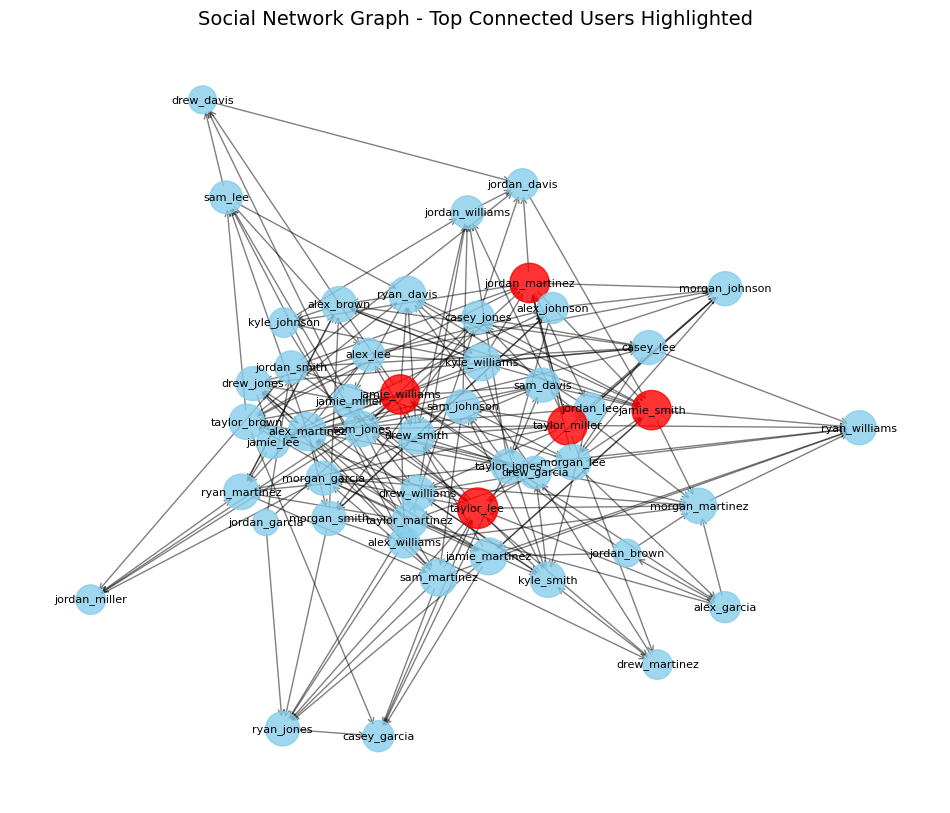

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# === 1. Load CSV file ===
file_path = "/content/social_network_edges.csv"
df = pd.read_csv(file_path)

# === 2. Create a directed graph ===
G = nx.DiGraph()

# Add edges from CSV
for _, row in df.iterrows():
    G.add_edge(row['Follower'], row['Followee'])

print(f"Graph created with {G.number_of_nodes()} users and {G.number_of_edges()} relationships.")

# === 3. Find top 5 most connected users ===
# Total degree = in-degree (followers) + out-degree (followees)
degree_dict = {node: G.in_degree(node) + G.out_degree(node) for node in G.nodes()}
sorted_users = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

top_5 = sorted_users[:5]

print("\nTop 5 most connected users:")
for user, degree in top_5:
    print(f"{user}: {degree} connections")

# === 4. Visualize the graph ===
plt.figure(figsize=(12, 10))

# Layout
pos = nx.spring_layout(G, seed=42)  # fix seed for consistency

# Node sizes: scale based on degree (make top users bigger)
node_sizes = [200 + degree_dict[node] * 50 for node in G.nodes()]

# Node colors: highlight top 5
top_nodes = [user for user, _ in top_5]
node_colors = ["red" if node in top_nodes else "skyblue" for node in G.nodes()]

# Draw graph
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle="->", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Social Network Graph - Top Connected Users Highlighted", fontsize=14)
plt.axis("off")
plt.show()



---
### Chapter 17: *Simulations*



a) Inventory Management - Monte Carlo Simulation <br>

*Inventory Management Challenges:*<br>
*   Minimizing costs
*   Managing lead times
*   Adjusting to variability in demand

*Simulating Inventory Flow:* <br>
*   Demand forecasting - using historical data to estimate distribution
*   Lead time forecasting - using supplier past performance to estimate distribution
*   Holding cost - costs of storing inventory
*   Shortage cost - costs of not having sufficient inventory

*Executing a Simulation:* <br>
*   Randomly select demand and lead time
*   Calculate inventory levels - initial stock,order volume and lead times
*   Update inventory levels
*   Repeat the process with different values of the demand and lead time
*   Analyze results - average inventory level, daily holding costs, total shortage cost, percent of demand met without shortage cost, holding cost vs service level trade-offs

*ChatGPT Prompt:* <br>
Create a Python Script to use a Monte Carlo simulation to model inventory. Assume one item that follows a normal distribution and has a fixed lead time for restocking. Include parameters for starting inventory level, average daily demand, standard deviation for demand, time required to restock, number of items in a restocking order, number of days to run the simulation and number of times to run the simulation. Also, include parameters for holding costs and out of stock costs. After running the simulation, create a visualization showing the distribution of the total daily costs.

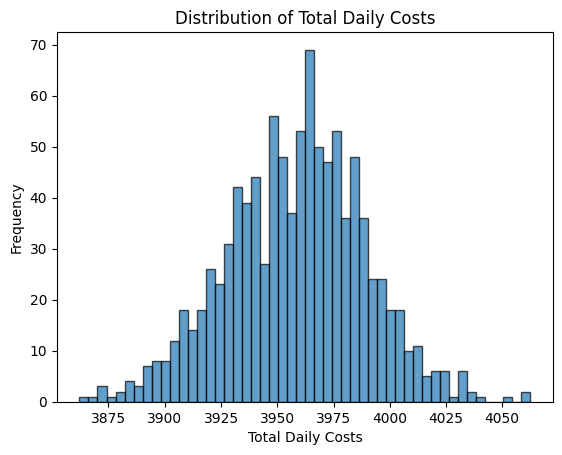

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
starting_inventory = 100
average_daily_demand = 10
std_dev_demand = 2
lead_time = 5
restock_order = 50
simulation_days = 365
num_simulations = 1000
holding_cost_per_unit = 0.1
out_of_stock_cost_per_unit = 1.0

def run_simulation():
    inventory = starting_inventory
    total_costs = 0
    restock_queue = []

    for day in range(simulation_days):
        # Check if any restocking orders arrive today
        if restock_queue and restock_queue[0] == day:
            inventory += restock_order
            restock_queue.pop(0)

        # Demand for today
        demand = np.random.normal(average_daily_demand, std_dev_demand)
        demand = max(0, demand)  # Ensure demand is non-negative

        # Calculate costs
        if inventory >= demand:
            holding_cost = inventory * holding_cost_per_unit
            inventory -= demand
            out_of_stock_cost = 0
        else:
            holding_cost = inventory * holding_cost_per_unit
            out_of_stock_cost = (demand - inventory) * out_of_stock_cost_per_unit
            inventory = 0

        total_costs += holding_cost + out_of_stock_cost

        # Restock if inventory is below the average daily demand
        if inventory < average_daily_demand:
            restock_queue.append(day + lead_time)

    return total_costs

# Run simulations
costs = [run_simulation() for _ in range(num_simulations)]

# Visualization
plt.hist(costs, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Daily Costs')
plt.xlabel('Total Daily Costs')
plt.ylabel('Frequency')
plt.show()

Mean Total Daily Cost: 3485.1240276404887


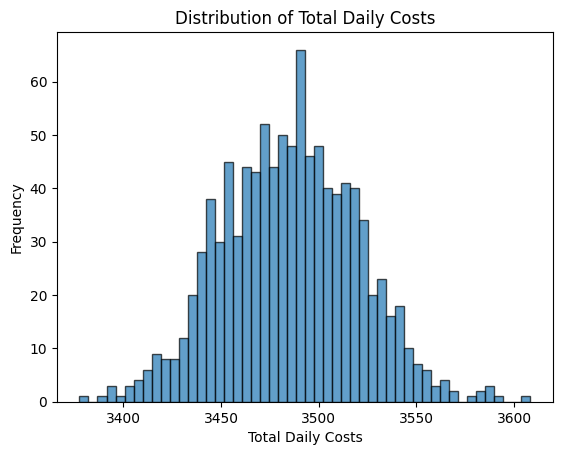

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
starting_inventory = 100
average_daily_demand = 15
std_dev_demand = 3
lead_time = 4
restock_order = 50
simulation_days = 365
num_simulations = 1000
holding_cost_per_unit = 0.1
out_of_stock_cost_per_unit = 1.0

def run_simulation():
    inventory = starting_inventory
    total_costs = 0
    restock_queue = []

    for day in range(simulation_days):
        # Check if any restocking orders arrive today
        if restock_queue and restock_queue[0] == day:
            inventory += restock_order
            restock_queue.pop(0)

        # Demand for today
        demand = np.random.normal(average_daily_demand, std_dev_demand)
        demand = max(0, demand)  # Ensure demand is non-negative

        # Calculate costs
        if inventory >= demand:
            holding_cost = inventory * holding_cost_per_unit
            inventory -= demand
            out_of_stock_cost = 0
        else:
            holding_cost = inventory * holding_cost_per_unit
            out_of_stock_cost = (demand - inventory) * out_of_stock_cost_per_unit
            inventory = 0

        total_costs += holding_cost + out_of_stock_cost

        # Restock if inventory is below the average daily demand
        if inventory < average_daily_demand:
            restock_queue.append(day + lead_time)

    return total_costs

# Run simulations
costs = [run_simulation() for _ in range(num_simulations)]

# Calculate mean total daily cost
mean_total_cost = np.mean(costs)
print(f"Mean Total Daily Cost: {mean_total_cost}")

# Visualization
plt.hist(costs, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Daily Costs')
plt.xlabel('Total Daily Costs')
plt.ylabel('Frequency')
plt.show()

b) Agent-Based Modeling: Modeling the Spread of Infectious Disease

*Modeling Infectious Disease Spread:* <br>
*   Goal is to understand impact of changes to behaviors of people
*   Agents can model variability of behaviors

*Components of Models:* <br>
*   Agent (age, health status)
*   Environment (area, city, school, classroom)
*   Interactions (when people come into contact with one another)
*   Rules (transitions: susceptible to infected)

*Executing Simulation:* <br>
*   Specify initial conditions (number of agents, initial infections, environment initialization)
*   Time steps (simulate interactions, update health status based on transition rules, repeat steps periodically)
*   Analyze results (number of infected, susceptible, healthy; timing of infections (peak periods), effect of interventions (lock-down, quarantine))

*ChatGPT Prompt:* <br>
Create a python script to model the spread of an infectious disease in a community. Assume a SIR (susceptible, infected, recovered) model. There should be 1000 agents in the model and 1 infected agent to start. Model the spread at hour level. There should be a parameter to specify the probability of an infected person infecting a susceptible person. Create a visualization to show the changes in susceptible, infected and recovered over time. Run the simulation for 180 hours.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------
# Parameters
# -------------------
N = 1000              # total population
I0 = 1                # initial infected
R0 = 0                # initial recovered
S0 = N - I0 - R0      # initial susceptible

beta = 0.5        # infection probability per contact per hour
gamma = 0.25          # recovery probability per hour
hours = 180           # simulation duration in hours

# -------------------
# SIR arrays
# -------------------
S = [S0]
I = [I0]
R = [R0]

# -------------------
# Simulation
# -------------------
for t in range(1, hours + 1):
    S_current = S[-1]
    I_current = I[-1]
    R_current = R[-1]

    # Probability of infection per susceptible individual
    prob_infection = beta * (I_current / N)

    # New infections and recoveries (stochastic process)
    new_infections = np.random.binomial(S_current, prob_infection)
    new_recoveries = np.random.binomial(I_current, gamma)

    # Update counts
    S_next = S_current - new_infections
    I_next = I_current + new_infections - new_recoveries
    R_next = R_current + new_recoveries

    S.append(S_next)
    I.append(I_next)
    R.append(R_next)

# -------------------
# Visualization
# -------------------
plt.figure(figsize=(10,6))
plt.plot(S, label="Susceptible", color="blue")
plt.plot(I, label="Infected", color="red")
plt.plot(R, label="Recovered", color="green")
plt.xlabel("Time (hours)")
plt.ylabel("Number of agents")
plt.title("SIR Model of Infectious Disease Spread (Simulation over 180 hours)")
plt.legend()
plt.grid(True)
plt.show()

**Challenge:** Simulating Forest Fires <br>
*   Create an agent-based model of forest fires
*   Use a 1000 x 1000 grid
*   Each cell has one tree; Trees can have three states: unburned, burning and burnt
*   A burning tree becomes burned after two time units
*   A burning tree sets its neighboring unburned trees on fire
*   Run the simulation for atmost 200 time units
*   Add a rule to allow a burning tree to cause another tree upto 3 cells away to start burning with a particular probability of 0.3.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Grid size
grid_size = 1000

# Time parameters
max_time = 200

# Tree states
UNBURNED = 0
BURNING = 1
BURNT = 2

# Initialize forest grid
forest = np.zeros((grid_size, grid_size), dtype=int)

# To track how long a tree has been burning
burn_time = np.zeros((grid_size, grid_size), dtype=int)

# Randomly select the first burning tree
initial_fire_i = np.random.randint(0, grid_size)
initial_fire_j = np.random.randint(0, grid_size)
forest[initial_fire_i, initial_fire_j] = BURNING

# Directions for 8 neighbors (Moore neighborhood)
neighbors = [(-1, -1), (-1, 0), (-1, 1),
             (0, -1),          (0, 1),
             (1, -1),  (1, 0), (1, 1)]

for t in range(max_time):
    new_forest = forest.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if forest[i, j] == BURNING:
                burn_time[i, j] += 1
                # If tree has burned for 2 time units, it becomes BURNT
                if burn_time[i, j] >= 2:
                    new_forest[i, j] = BURNT
                else:
                    # Spread fire to unburned neighbors
                    for dx, dy in neighbors:
                        ni, nj = i + dx, j + dy
                        if 0 <= ni < grid_size and 0 <= nj < grid_size:
                            if forest[ni, nj] == UNBURNED:
                                new_forest[ni, nj] = BURNING
    forest = new_forest

# Count trees in each state
num_unburned = np.sum(forest == UNBURNED)
num_burning = np.sum(forest == BURNING)
num_burnt = np.sum(forest == BURNT)

print(f"Number of unburned trees: {num_unburned}")
print(f"Number of burning trees: {num_burning}")
print(f"Number of burnt trees: {num_burnt}")

# Visualization: Heatmap
plt.figure(figsize=(5, 5))
plt.imshow(forest, cmap='hot', interpolation='nearest')
plt.title("Forest Fire Simulation (Final State)")
plt.colorbar(ticks=[0, 1, 2], label='Tree State')
plt.clim(-0.5, 2.5)
plt.show()

Number of unburned trees: 365605
Number of burning trees: 9403
Number of burnt trees: 624992


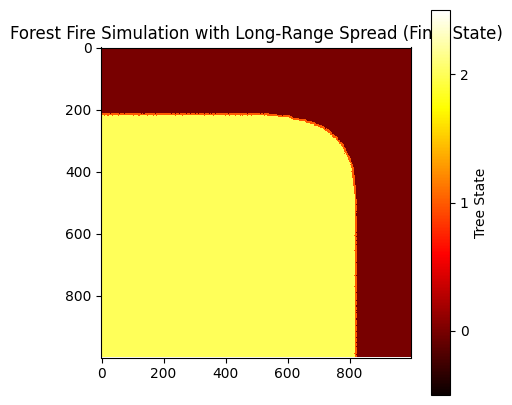

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Grid size
grid_size = 1000

# Time parameters
max_time = 200

# Tree states
UNBURNED = 0
BURNING = 1
BURNT = 2

# Long-range spread parameters
long_range_distance = 3
long_range_prob = 0.3

# Initialize forest grid
forest = np.zeros((grid_size, grid_size), dtype=int)

# Track burning duration
burn_time = np.zeros((grid_size, grid_size), dtype=int)

# Randomly select the first burning tree
initial_fire_i = np.random.randint(0, grid_size)
initial_fire_j = np.random.randint(0, grid_size)
forest[initial_fire_i, initial_fire_j] = BURNING

# Directions for immediate neighbors (Moore neighborhood)
neighbors = [(-1, -1), (-1, 0), (-1, 1),
             (0, -1),          (0, 1),
             (1, -1),  (1, 0), (1, 1)]

for t in range(max_time):
    new_forest = forest.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if forest[i, j] == BURNING:
                burn_time[i, j] += 1
                # Burned after 2 time units
                if burn_time[i, j] >= 2:
                    new_forest[i, j] = BURNT
                else:
                    # Spread to immediate neighbors
                    for dx, dy in neighbors:
                        ni, nj = i + dx, j + dy
                        if 0 <= ni < grid_size and 0 <= nj < grid_size:
                            if forest[ni, nj] == UNBURNED:
                                new_forest[ni, nj] = BURNING

                    # Spread to long-range neighbors with probability
                    for dx in range(-long_range_distance, long_range_distance + 1):
                        for dy in range(-long_range_distance, long_range_distance + 1):
                            if dx == 0 and dy == 0:
                                continue  # skip the burning tree itself
                            ni, nj = i + dx, j + dy
                            if 0 <= ni < grid_size and 0 <= nj < grid_size:
                                if forest[ni, nj] == UNBURNED:
                                    if np.random.rand() < long_range_prob:
                                        new_forest[ni, nj] = BURNING
    forest = new_forest

# Count trees in each state
num_unburned = np.sum(forest == UNBURNED)
num_burning = np.sum(forest == BURNING)
num_burnt = np.sum(forest == BURNT)

print(f"Number of unburned trees: {num_unburned}")
print(f"Number of burning trees: {num_burning}")
print(f"Number of burnt trees: {num_burnt}")

# Heatmap visualization
plt.figure(figsize=(5, 5))
plt.imshow(forest, cmap='hot', interpolation='nearest')
plt.title("Forest Fire Simulation with Long-Range Spread (Final State)")
plt.colorbar(ticks=[0, 1, 2], label='Tree State')
plt.clim(-0.5, 2.5)
plt.show()




---

